# El consumo de alcohol en los estudiantes.
#### María de los Reyes Roldán López

## Introducción

Los datos fueron obtenidos en una encuesta de estudiantes de matemáticas y cursos de lengua portuguesa en la escuela secundaria. El objetivo principal de este proyecto es analizar las correlación de factores como el tiempo de estudio y las relaciones familiares con el consumo de alcohol en estudiantes, aunque también se abordan interrelaciones entre otros factores. Contiene mucha información social, de género y de estudio interesante sobre los estudiantes.

## Contenido 

Atributos para los conjuntos de datos student-mat.csv (curso de matemáticas) y student-por.csv (curso de portugués):

1. <code>school</code> - escuela del estudiante (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)

2. <code>sex</code> - sexo del estudiante (binario: 'F' - femenino o 'M' - masculino)

3. <code>age</code> - edad del estudiante (numérico: de 15 a 22)

6. <code>Pstatus</code> - estado de cohabitación de los padres (binario: 'T' - viviendo juntos o 'A' - separados)

8. <code>studytime</code> - tiempo de estudio semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)

9. <code>famsup</code> - apoyo educativo familiar (binario: si o no)

10. <code>romantic</code> - con una relación romántica (binario: sí o no)

11. <code>famrel</code> - calidad de las relaciones familiares (numérico: de 1 - muy mala a 5 - excelente)

12. <code>freetime</code> - tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)

13. <code>goout</code> - salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto)

14. <code>Dalc</code> - consumo de alcohol en jornada laboral (numérico: de 1 - muy bajo a 5 - muy alto)

15. <code>Walc</code> - consumo de alcohol en fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)

16. <code>health</code> - estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)


Estas calificaciones están relacionadas con la materia del curso, Matemáticas o Portugués:

17. <code>G1</code> - nota del primer período (numérico: de 0 a 20)
18. <code>G2</code> - calificación del segundo período (numérico: de 0 a 20)
19. <code>G3</code> - calificación final (numérica: de 0 a 20, objetivo de salida)

Debemos importar módulos de la librería estandar, y un único paquete externo (matplotlib):

In [1]:
import csv
from matplotlib import pyplot as plt
from collections import namedtuple, Counter, defaultdict

In [2]:
import pandas as pd
data = pd.read_csv('studentmat - studentmat.csv')
print (data)

    school sex  age famsize Pstatus  studytime famsup romantic  famrel  \
0       GP   F   18     GT3       A          2     no       no       4   
1       GP   F   17     GT3       T          2    yes       no       5   
2       GP   F   15     LE3       T          2     no       no       4   
3       GP   F   15     GT3       T          3    yes      yes       3   
4       GP   F   16     GT3       T          2    yes       no       4   
..     ...  ..  ...     ...     ...        ...    ...      ...     ...   
144     GP   M   17     GT3       T          1    yes       no       5   
145     GP   F   15     GT3       T          2    yes       no       4   
146     GP   F   15     GT3       T          2    yes       no       3   
147     GP   F   15     GT3       T          2    yes       no       4   
148     GP   M   16     GT3       T          1    yes      yes       3   

     freetime  goout  Dalc  Walc  health  G1  G2  G3  
0           3      4     1     1       3   5   6   6  
1

### Función de lectura de texto.
Abriremos el fichero en modo texto, así es posible leer todo el contenido y guardarlo en una variable de tipo cadena mediante el método read:

In [3]:
with open('studentmat2.txt', encoding='utf-8') as f:
    for linea in f:
        print(linea)

school,sex,age,famsize,Pstatus,studytime,famsup,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3

GP,F,18,GT3,A,2,no,no,4,3,4,1,1,3,5,6,6

GP,F,17,GT3,T,2,yes,no,5,3,3,1,1,3,5,5,6

GP,F,15,LE3,T,2,no,no,4,3,2,2,3,3,7,8,10

GP,F,15,GT3,T,3,yes,yes,3,2,2,1,1,5,15,14,15

GP,F,16,GT3,T,2,yes,no,4,3,2,1,2,5,6,10,10

GP,M,16,LE3,T,2,yes,no,5,4,2,1,2,5,15,15,15

GP,M,16,LE3,T,2,no,no,4,4,4,1,1,3,12,12,11

GP,F,17,GT3,A,2,yes,no,4,1,4,1,1,1,6,5,6

GP,M,15,LE3,A,2,yes,no,4,2,2,1,1,1,16,18,19

GP,M,15,GT3,T,2,yes,no,5,5,1,1,1,5,14,15,15

GP,F,15,GT3,T,2,yes,no,3,3,3,1,2,2,10,8,9

GP,F,15,GT3,T,3,yes,no,5,2,2,1,1,4,10,12,12

GP,M,15,LE3,T,1,yes,no,4,3,3,1,3,5,14,14,14

GP,M,15,GT3,T,2,yes,no,5,4,3,1,2,3,10,10,11

GP,M,15,GT3,A,3,yes,yes,4,5,2,1,1,3,14,16,16

GP,F,16,GT3,T,1,yes,no,4,4,4,1,2,2,14,14,14

GP,F,16,GT3,T,3,yes,no,3,2,3,1,2,2,13,14,14

GP,F,16,GT3,T,2,yes,no,5,3,2,1,1,4,8,10,10

GP,M,17,GT3,T,1,yes,no,5,5,5,2,4,5,6,5,5

GP,M,16,LE3,T,1,no,no,3,1,3,1,3,5,8,10,10

GP,M,15,GT3,T,2

Se puede observar cada línea separada por una línea vacía, esto se debe a que hemos usado el descriptor del fichero dentro de un bucle for, como si se tratara de una secuencia de cadenas, de manera que en cada paso del bucle obtendremos la siguiente línea del fichero.

La siguiente función será la encargada de leer el fichero de entrada, y construir a partir de él una estructura de datos en memoria.

In [4]:
Estudiante = namedtuple('Estudiante', 'school sex age famsize Pstatus studytime famsup romantic famrel freetime goout Dalc Walc health G1 G2 G3')
def lee_estudiantes(fichero):
    with open(fichero, encoding='utf-8') as f:
        # Se crea un objeto lector (un iterator) que separará los valores por comas
        lector = csv.reader(f)
        next(lector) 
        # Lista por comprensión sobre el objeto lector
        l_estudiantes = [Estudiante(str(school), str(sex), int(age), str(famsize), str(Pstatus), int(studytime), str(famsup), str(romantic), int(famrel), int(freetime), int(goout), int(Dalc), int(Walc), int(health), int(G1), int(G2), int(G3)) for school, sex, age, famsize, Pstatus, studytime, famsup, romantic, famrel, freetime, goout, Dalc, Walc, health, G1, G2, G3 in lector]
        return l_estudiantes

In [5]:
# Test de la función lee_estudiantes
ESTUDIANTES = lee_estudiantes('studentmat - studentmat.csv')
print(len(ESTUDIANTES))
print(ESTUDIANTES[:7])

149
[Estudiante(school='GP', sex='F', age=18, famsize='GT3', Pstatus='A', studytime=2, famsup='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, G1=5, G2=6, G3=6), Estudiante(school='GP', sex='F', age=17, famsize='GT3', Pstatus='T', studytime=2, famsup='yes', romantic='no', famrel=5, freetime=3, goout=3, Dalc=1, Walc=1, health=3, G1=5, G2=5, G3=6), Estudiante(school='GP', sex='F', age=15, famsize='LE3', Pstatus='T', studytime=2, famsup='no', romantic='no', famrel=4, freetime=3, goout=2, Dalc=2, Walc=3, health=3, G1=7, G2=8, G3=10), Estudiante(school='GP', sex='F', age=15, famsize='GT3', Pstatus='T', studytime=3, famsup='yes', romantic='yes', famrel=3, freetime=2, goout=2, Dalc=1, Walc=1, health=5, G1=15, G2=14, G3=15), Estudiante(school='GP', sex='F', age=16, famsize='GT3', Pstatus='T', studytime=2, famsup='yes', romantic='no', famrel=4, freetime=3, goout=2, Dalc=1, Walc=2, health=5, G1=6, G2=10, G3=10), Estudiante(school='GP', sex='M', age=16, famsize='LE3',

### Función de transformación.

Una vez cargados los datos ya podremos trabajar con ellos. La primera función que realizaremos será la función <code>calcula_edades</code> de la cual obtendremos, a partir de los datos de entrada, una lista con todas las edades de los estudiantes. Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función:

In [6]:
def calcula_edades(l_estudiantes):
    ''' Calcula las edades presentes en una lista de estudiantes
    
    ENTRADA: 
       - l_estudiantes: lista de estudiantes -> [(str, str, int, str, str, int, str, str, int, int, int, int, int, int, int, int, int)]
    SALIDA: 
       - lista de edades -> [int]

    Toma como entrada una lista de tupla y produce como
    salida una lista con todas las edades.
    '''
    # Calculamos el conjunto de ediciones presentes
    edades = [e.age for e in ESTUDIANTES]
    return edades

In [7]:
# Test de la función calcula_ediciones
edades = calcula_edades(ESTUDIANTES)
print(edades)

[18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 17, 16, 15, 15, 16, 16, 15, 16, 15, 15, 16, 16, 15, 15, 15, 15, 16, 15, 15, 16, 15, 15, 16, 15, 15, 15, 16, 15, 16, 16, 15, 15, 16, 15, 15, 15, 15, 16, 15, 15, 15, 16, 16, 16, 16, 16, 15, 16, 15, 16, 15, 15, 16, 15, 15, 16, 16, 15, 15, 16, 17, 16, 15, 15, 15, 15, 15, 15, 16, 15, 16, 16, 16, 15, 16, 16, 15, 15, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 16, 15, 16, 15, 16, 16, 15, 15, 16, 15, 16, 17, 15, 15, 15, 16, 16, 16, 15, 15, 19, 18, 16, 15, 15, 17, 16, 15, 15, 17, 16, 16, 15, 15, 16, 15, 16, 17, 15, 15, 15, 16]


La segunda de las funciones, <code>media_por_edades</code>, es una función de _transformación_. Se encargará de calcular la media de edades de los estudiantes registrados. 

In [8]:
def medias_por_edades(l_estudiantes):
    ''' Calcula la media de edades de estudiantes.
    
    ENTRADA: 
       - l_estudiantes: lista de estudiantes -> [(str, str, int, str, str, int, str, str, int, int, int, int, int, int, int, int, int)]
    SALIDA:
       - medias de edades de estudiantes -> float

    Toma como entrada una lista de tuplas y produce como
    salida la media de las edades de los estudiantes .
    '''
    medias = sum(edades)/len(edades)
    return medias


In [9]:
# Test de la función medias_por_edades
medias = medias_por_edades(ESTUDIANTES)
print("La media de edad de estudiantes es", medias)

La media de edad de estudiantes es 15.577181208053691


### Función de filtrado.

La siguiente función se llama <code>filtra_por_calificacion_final</code>. Toma una lista de estudiantes, y un rango de valores para la calificación final. Deberá seleccionar solamente aquellos estudiantes cuya calificación esté dentro del rango. El rango se especificará con un valor mínimo y un valor máximo. Pudiéndose omitirse cualquiera de estos dos límites haciendo uso del valor por defecto <code>None</code>.

In [10]:
def filtra_por_calificacion_final(l_estudiantes, minimo=None, maximo=None):
    if minimo is None:
        minimo = 0
    if maximo is None:
        maximo = max(e.G3 for e in ESTUDIANTES)
    calificaciones = [e.G3 for e in ESTUDIANTES if minimo<=e.G3<=maximo]
    contador_calificaciones = Counter(calificaciones)
    calificaciones = dict(contador_calificaciones)
    return (calificaciones)

In [11]:
print(filtra_por_calificacion_final(ESTUDIANTES))
print(filtra_por_calificacion_final(ESTUDIANTES, 5, 10))
print(filtra_por_calificacion_final(ESTUDIANTES, 10, 15))

{6: 10, 10: 17, 15: 17, 11: 21, 19: 3, 9: 8, 12: 10, 14: 10, 16: 7, 5: 4, 8: 9, 17: 2, 18: 6, 13: 11, 20: 1, 7: 2, 0: 11}
{6: 10, 10: 17, 9: 8, 5: 4, 8: 9, 7: 2}
{10: 17, 15: 17, 11: 21, 12: 10, 14: 10, 13: 11}


### Función de agrupación.
La siguiente función se llama <code>tiempo_de_estudio_por_sexo</code>. Toma como entrada una lista de estudiantes y produce como salida un diccionario cuyas claves son el sexo del estudiante (masculino o femenino) y los valores son el tiempo de estudio medio por sexo.

In [12]:
def tiempo_de_estudio_por_sexo(l_estudiantes):
    
    ''' Crea un diccionario con el tiempo de estudio medio por sexo
    
    ENTRADA:
       - l_restudiantes: lista de estudiantes -> [(str, str, int, str, str, int, str, str, int, int, int, int, int, int, int, int, int)]
    SALIDA:
       - diccionario con el tiempo de estudio medio en función del sexo -> {str: float}
    '''
    
    sexos={e.sex for e in ESTUDIANTES}
    tiempo_medio = dict()
    for t in sexos:
        tiempo = [e.studytime for e in ESTUDIANTES if e.sex == t] #agrupación + agregación
        tiempo_medio[t]=sum(tiempo)/len(tiempo)
    return (tiempo_medio)

In [13]:
print ("El tiempo de estudio medio de estudiantes por sexo es", tiempo_de_estudio_por_sexo(ESTUDIANTES))

El tiempo de estudio medio de estudiantes por sexo es {'F': 2.142857142857143, 'M': 1.9583333333333333}


### Función de visualización.
La función de visualización que implementaremos será <code>muestra_calificaciones_medias_por_genero</code>. Toma como entrada una lista de estudiantes, y genera un diagrama de barras en el que se muestra la calificacion media para cada sexo (masculino y femenino) presente en el conjunto de datos.

In [15]:
def muestra_calificaciones_medias_por_genero(l_estudiantes):
    titulo = 'Calificaciones medias por género'
    generos = sorted(set(e.sex for e in ESTUDIANTES))
    
    calificaciones = defaultdict(list)
    for e in ESTUDIANTES:
        calificaciones[e.sex].append(e.G3)
    for genero in calificaciones:
        valores = calificaciones[genero]
        calificaciones[genero] = sum(valores)/len(valores)
        calificaciones_medias = [calificaciones[genero] for genero in generos]
    plt.title(titulo)
    plt.bar(generos, calificaciones_medias)
    plt.show()
    

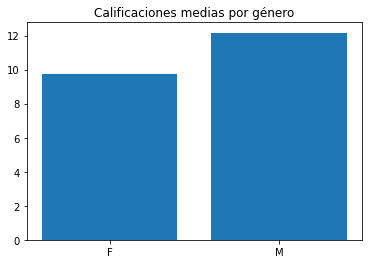

In [16]:
muestra_calificaciones_medias_por_genero(ESTUDIANTES)